# Plot Scripts

## Setup and Common Functions

### Import libraries

In [1]:
from benchmarks.experiments.wrapper_overhead.common.data_collection_utility import WrapperOverheadCollectionUtility
import numpy as np
from matplotlib import rc, pyplot as plt

### Setup Common Resources

In [2]:
region = 'us-east-2'
collection_utility: WrapperOverheadCollectionUtility = WrapperOverheadCollectionUtility(region)

### Plotting functions

In [3]:
def dynamic_bar_plot(experimental_results, experiment_order, plotting_order, figsize=(14, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    # Setting up the style and font size as per the provided preferences
    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    bar_width = 0.14  # Specified bar width
    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]  # Specified color scheme
    hatches = ["", "/", "\\", "x", "o", "."]  # Pattern styles for differentiation
    
    num_categories = len(plotting_order)
    # num_experiments = len(experiment_order)
    
    # Compute positions for each set of bars
    positions = np.arange(len(experiment_order)) * (num_categories * bar_width + bar_width)
    
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            values = experimental_results[experiment].get(category, [0])
            mean_value = np.mean(values)  # Calculate mean for simplicity

            # Divide by 1000 to convert to seconds
            mean_value /= 1000

            ax.bar(i + j * bar_width, mean_value, bar_width, label=f"{category} ({experiment})" if i == 0 else "",
                   color=colors[j % len(colors)], hatch=hatches[j % len(hatches)], edgecolor="black", zorder=3)

    # Setting x-ticks and labels
    ax.set_xticks(positions + (bar_width * num_categories) / 2)
    ax.set_xticklabels(experiment_order, fontsize=fontsize)
    
    ax.legend(title="Category", fontsize=fontsize)
    ax.set_ylabel('End-To-End-Latency (s)', fontsize=fontsize)
    ax.set_title('Experimental Results Comparison', fontsize=fontsize + 2)
    ax.grid(axis='y', which='both', zorder=0, alpha=0.6)

    plt.tight_layout()
    plt.show()

In [4]:
def dynamic_box_plot_with_all_labels(experimental_results, experiment_order, plotting_order, figsize=(14, 12)):
    fig, ax = plt.subplots(figsize=figsize)

    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]
    
    data_for_box_plots = []
    all_labels = []  # This will include labels for all categories, including those with zero-data
    non_empty_data_positions = []  # Positions of categories with non-zero data for actual plotting
    current_position = 0  # Tracks the position for non-empty data sets
    
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            label = f"{category}\n({experiment})"
            all_labels.append(label)
            if category in experimental_results[experiment] and np.any(experimental_results[experiment][category]):
                # Include this category's data only if it's non-zero
                values = np.array(experimental_results[experiment][category]) / 1000  # Convert to seconds
                data_for_box_plots.append(values)
                non_empty_data_positions.append(current_position)
            current_position += 1

    # Plotting non-empty box plots
    if data_for_box_plots:
        bp = ax.boxplot(data_for_box_plots, positions=non_empty_data_positions, patch_artist=True, widths=0.6)

        # Coloring and styling the boxes
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            
        # Adjusting the x-axis to include all categories
        ax.set_xticks(range(len(all_labels)))
        ax.set_xticklabels(all_labels, fontsize=fontsize, rotation=45, ha="right")
        ax.set_xlim(-0.5, len(all_labels) - 0.5)  # Adjust x-axis limits to include all labels
    else:
        # No non-empty data to plot
        ax.text(0.5, 0.5, 'All categories have zero-data', horizontalalignment='center', verticalalignment='center',
                fontsize=fontsize, transform=ax.transAxes)
    
    ax.set_ylabel('End-to-End Latency (s)', fontsize=fontsize)
    ax.set_title('Experimental Results Distribution', fontsize=fontsize + 2)
    ax.grid(axis='y', which='both', zorder=0, alpha=0.6)

    plt.tight_layout()
    plt.show()

In [5]:
def dynamic_box_plot_filtered(experimental_results, experiment_order, plotting_order, figsize=(14, 12)):
    fig, ax = plt.subplots(figsize=figsize)

    # Apply the style and font size preferences
    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    # Colors for the box plots
    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]
    
    # Prepare data for box plots, filtering out categories with all zeros
    data_for_box_plots = []
    labels = []
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            if category in experimental_results[experiment]:
                # Convert to seconds and filter out all-zero categories
                values = np.array(experimental_results[experiment][category]) / 1000
                if not np.all(values == 0):
                    data_for_box_plots.append(values)
                    labels.append(f"{category}\n({experiment})")
    
    # Only proceed if there is data to plot
    if data_for_box_plots:
        # Box plot properties
        boxprops = dict(linestyle='-', linewidth=3, color='k')
        flierprops = dict(marker='o', color='#e7298a', markersize=6)
        medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
        whiskerprops = dict(linestyle='--', linewidth=2.5, color='orange')
        capprops = dict(linewidth=2.5, color='gray')

        bp = ax.boxplot(data_for_box_plots, labels=labels, patch_artist=True, boxprops=boxprops,
                        flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops,
                        capprops=capprops, notch=False, vert=True, widths=0.7, manage_ticks=True)

        # Coloring boxes
        for patch, color in zip(bp['boxes'], colors * len(experiment_order)):
            patch.set_facecolor(color)

        # Setting labels and title
        ax.set_ylabel('End-to-End Latency (s)', fontsize=fontsize)
        ax.set_title('Experimental Results Distribution', fontsize=fontsize + 2)
        ax.grid(axis='y', which='both', zorder=0, alpha=0.6)
        ax.tick_params(axis='x', rotation=45, labelsize=fontsize-2)
        ax.tick_params(axis='y', labelsize=fontsize-2)

        plt.tight_layout()
    else:
        ax.text(0.5, 0.5, 'No Data to Display', horizontalalignment='center', verticalalignment='center',
                fontsize=fontsize, transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

## Ploting Experiments

### All Non-Join

#### Gather data

In [6]:
allowed_experiment_types = {
    'boto3_direct': 'Direct Calls',
    'boto3_sns': 'SNS Calls',
    'multi_x': 'EntsGuard',
    'aws_step_function': 'AWS Step Function',
}
experiment_order = ['Data Visualization', 'Do Nothing'] # For tests
plotting_order = ['Direct Calls', 'SNS Calls', 'EntsGuard', 'AWS Step Function']

# Direct calls
experiment_paths = ['./dna_visualization/external_database']
    
experimental_results = collection_utility.aquire_experimental_results(experiment_paths, allowed_experiment_types, from_invocation=False)

In [10]:
experimental_results = { # From user invocation
    'Data Visualization': {
        'EntsGuard': [69870.82, 69952.884, 70472.476, 74311.65, 74022.547, 73952.813, 76396.681, 76067.463, 76713.061, 75241.617], 
        'Direct Calls': [82438.667, 87251.585, 88665.352, 91818.841, 93406.523, 93834.017, 93802.532, 94482.006, 95118.343, 95544.396], 
        'SNS Calls': [212238.854, 215166.914, 215283.567, 216780.394, 217235.315, 218637.574, 218864.016, 225136.789, 226759.094, 229681.947], 
        'AWS Step Function': [96154.844, 95931.351, 96293.683, 95306.836, 97295.672]
    }
}

In [8]:
experimental_results = { # From first function start
    'Data Visualization': {
        'EntsGuard': [67576.841, 69629.19, 70052.398, 72106.854, 71862.733, 73567.55, 74181.027, 74005.857, 74600.781, 74898.271], 
        'Direct Calls': [81444.162, 86423.056, 88468.497, 91069.329, 92689.961, 93667.099, 93634.519, 94316.159, 94913.106, 95372.089], 
        'SNS Calls': [88245.821, 91978.681, 92606.012, 93995.403, 93217.863, 88536.708, 93877.835, 93130.815, 90729.23, 91675.509], 
        'AWS Step Function': [95135.266, 95518.768, 95884.667, 95044.164, 96873.22]
    }
}

In [9]:
experimental_results['Do Nothing'] = {
    'EntsGuard': [0.0],
    'Direct Calls': [0.0],
    'SNS Calls': [0.0],
    'AWS Step Function': [0.0]
}

In [30]:
# experimental_results = { % OLD data
#     'Data Visualization': 
#     {
#         'EntsGuard': [69721.492, 73072.464, 72467.075, 76995.932, 77268.445, 76456.704, 75580.013, 76862.872, 76398.404, 73742.146], 
#         'Direct Calls': [88475.513, 90833.603, 90741.614, 90264.184, 90617.082, 91189.16, 95301.237, 94255.773, 97502.171, 95897.23], 
#         'SNS Calls': [94451.896, 93968.552, 94073.25, 94694.952, 94459.536, 93844.612, 94945.461, 94083.015, 84759.759, 96048.72], 
#         'AWS Step Function': [95364.076, 94395.541]
#     },
#     'Do Nothing':
#     {
#         'EntsGuard': [0.0],
#         'Direct Calls': [0.0],
#         'SNS Calls': [0.0],
#         'AWS Step Function': [0.0]
#     }
# }


#### Plot data

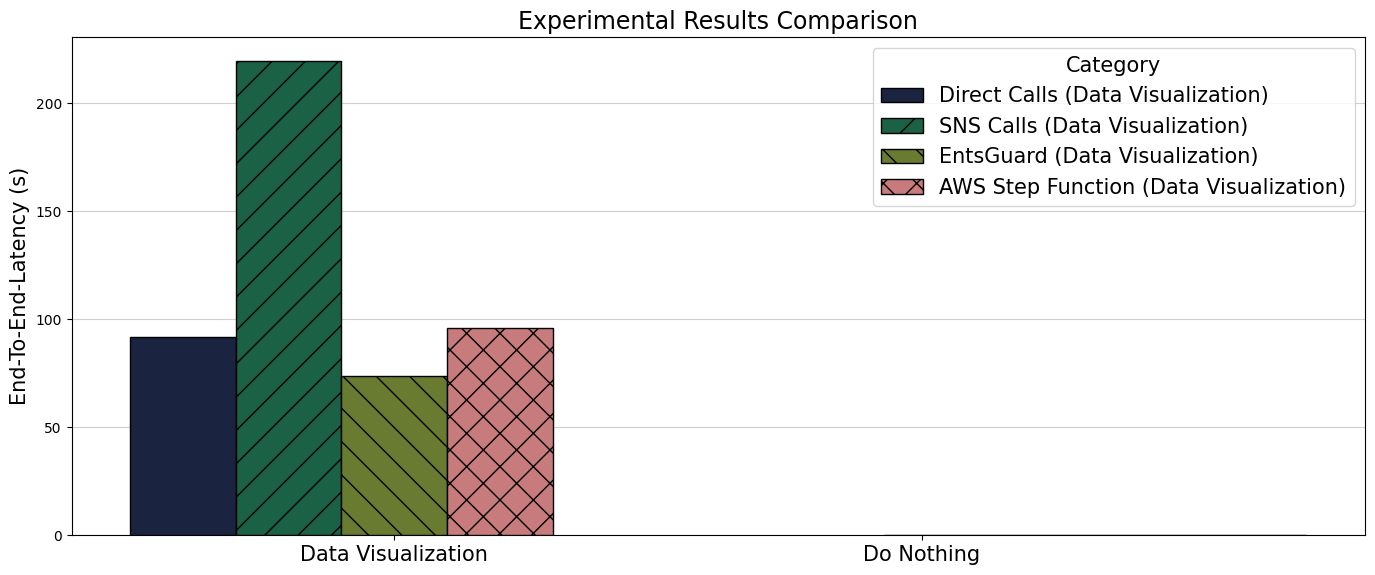

In [12]:
dynamic_bar_plot(experimental_results, experiment_order, plotting_order)

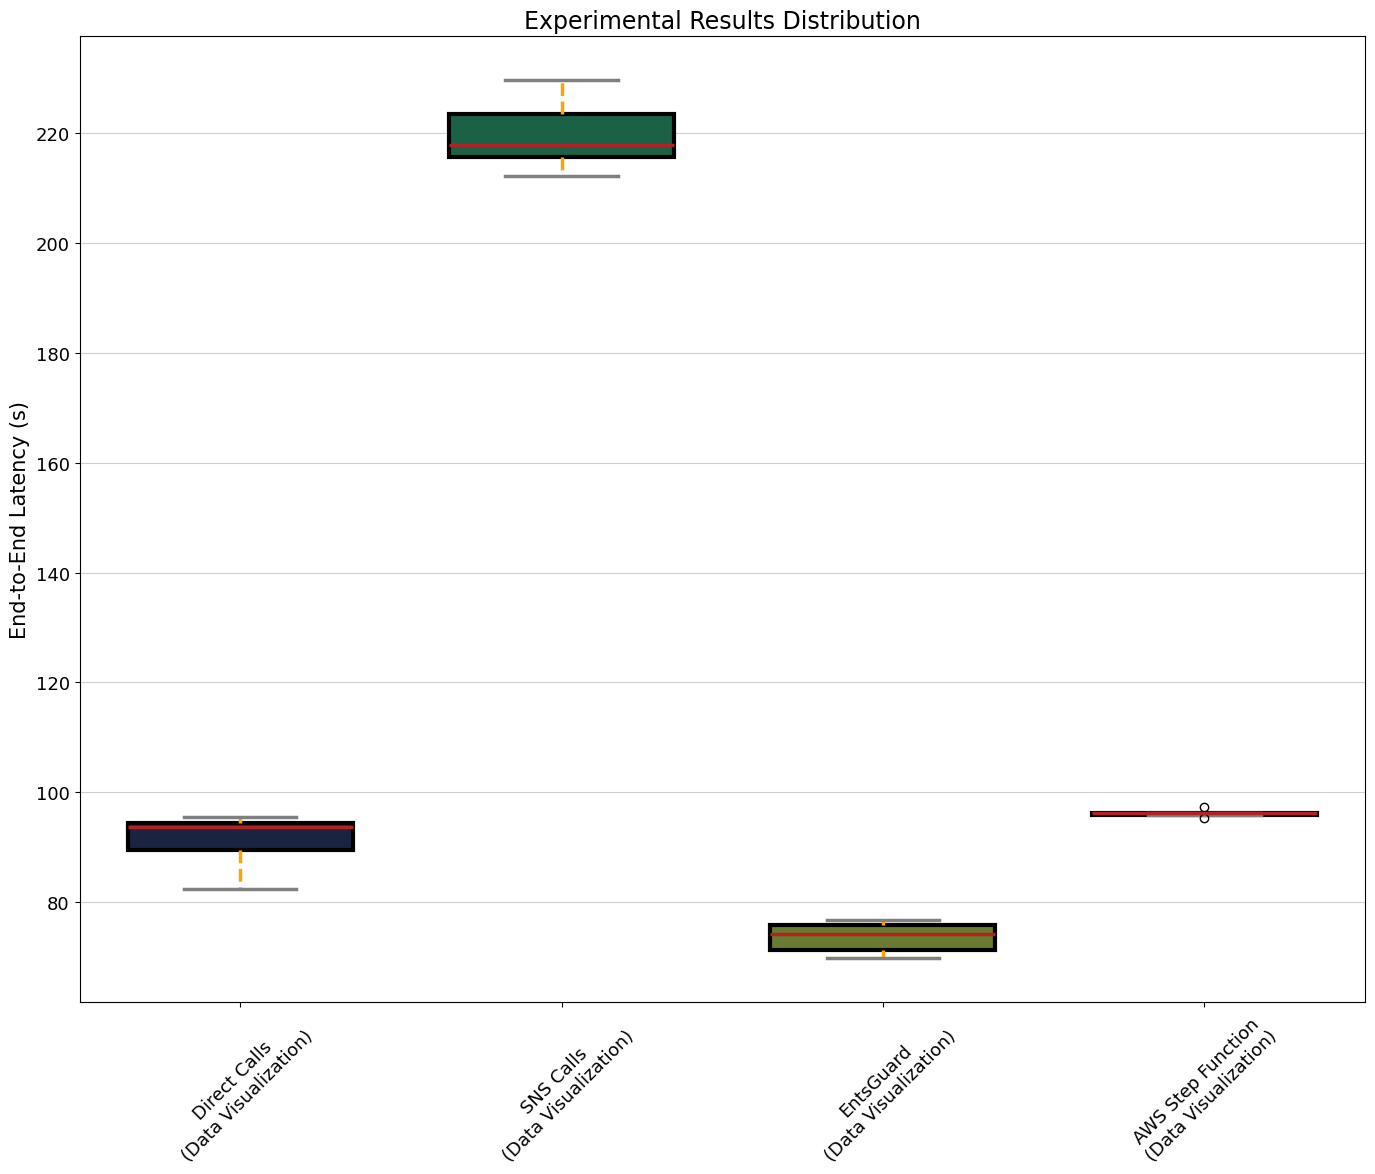

In [13]:
dynamic_box_plot_filtered(experimental_results, experiment_order, plotting_order)

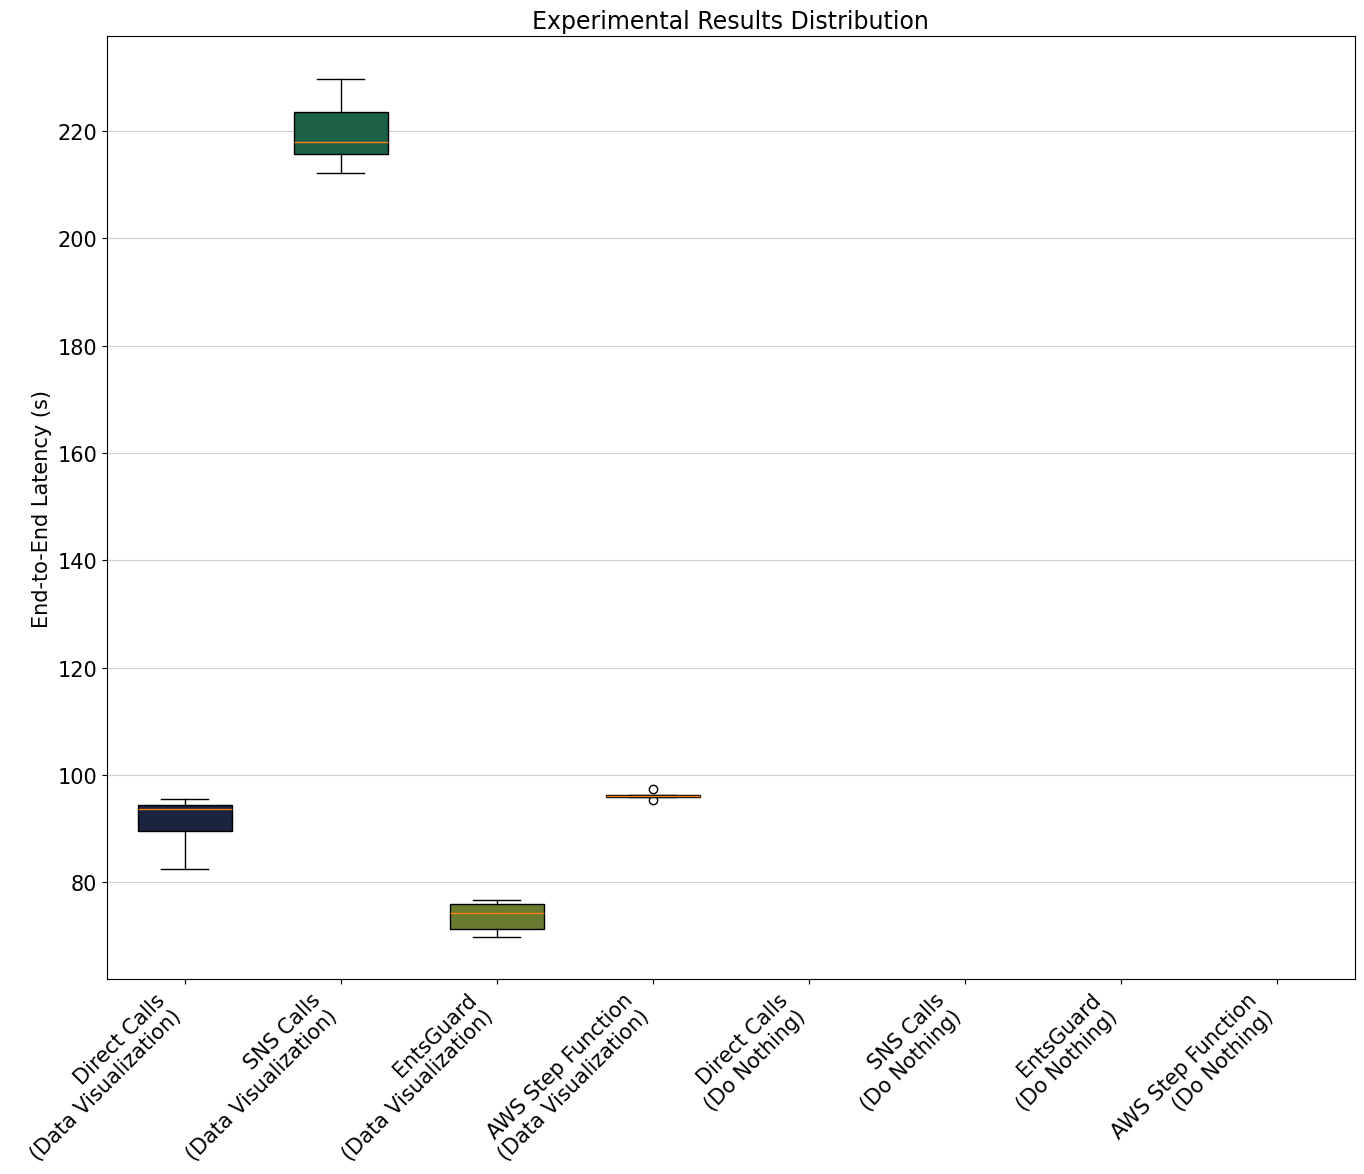

In [14]:
dynamic_box_plot_with_all_labels(experimental_results, experiment_order, plotting_order)